In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from copy import deepcopy
from warnings import filterwarnings

In [2]:
%matplotlib inline

In [3]:
filterwarnings("ignore")

In [4]:
# df = pd.read_csv('../data/Urmia.csv')
df = pd.read_excel('../data/T1017-1017.xlsx')

In [5]:
df.head()

,DistributeID,DistributeSerialNo,DistributeDate,DriverEmployeeID,PersonID,EmployeeID,DriverEmployeeName,ExitKM,ExitDateTime,EnterKM,...,CarID.1,CarNo,Volume,Weight,CarName,AssetNumber,InUse,GrossWeight,GrossWeight.1,weightOfTheShipment
0,1402310900006666,6666,1402/10/17,920942,NaN,920942,جلال ابراهيم وند,363695,14021017060314003,364030,...,7,ایران44-713ع31,1,2000,ایسوزو 6 تن,99245.0,1,35070,30672,1961.16
1,1402310900006666,6666,1402/10/17,920942,NaN,920942,جلال ابراهيم وند,363695,14021017060314003,364030,...,7,ایران44-713ع31,1,2000,ایسوزو 6 تن,99245.0,1,20886,18000,653.72
2,1402310900006666,6666,1402/10/17,920942,NaN,920942,جلال ابراهيم وند,363695,14021017060314003,364030,...,7,ایران44-713ع31,1,2000,ایسوزو 6 تن,99245.0,1,27531,23968,1961.16
3,1402310900006666,6666,1402/10/17,920942,NaN,920942,جلال ابراهيم وند,363695,14021017060314003,364030,...,7,ایران44-713ع31,1,2000,ایسوزو 6 تن,99245.0,1,56214,51432,1961.16
4,1402310900006666,6666,1402/10/17,920942,NaN,920942,جلال ابراهيم وند,363695,14021017060314003,364030,...,7,ایران44-713ع31,1,2000,ایسوزو 6 تن,99245.0,1,10271,9000,1307.44


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 154 entries, DistributeID to weightOfTheShipment
dtypes: float64(33), int64(86), object(35)
memory usage: 746.1+ KB


In [7]:
df_loc = deepcopy(df[['Latitude', 'Longitude']])

In [8]:
df_loc.isna().sum()

Latitude     10
Longitude    10
dtype: int64

In [9]:
df_loc.dropna(axis=0, inplace=True)

In [10]:
df_loc.isna().sum()

Latitude     0
Longitude    0
dtype: int64

In [11]:
df_loc.query('Latitude ==0 and Longitude == 0').index

Index([], dtype='int64')

In [12]:
df_loc.drop(index = [2, 3, 210], inplace=True)

In [13]:
x = df_loc.to_numpy()

In [14]:
x.shape

(607, 2)

In [15]:
db = DBSCAN(eps=0.01, min_samples=2).fit(x)

In [16]:
np.where(db.labels_ == -1)

(array([  7,  10,  14,  19,  29,  35,  36,  38,  40,  45,  47,  48,  53,
         56,  57,  62,  71,  77,  94, 106, 132, 142, 201, 207, 208, 215,
        217, 228, 239, 240, 289, 301, 318, 359, 398, 450, 456, 461, 467,
        480, 482, 568, 577, 578, 583, 595, 600, 602]),)

In [17]:
len(db.core_sample_indices_)

559

In [18]:
labels = db.labels_
n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters {n_cluster}')
print(f'Estimated number of noise points {n_noise}')

Estimated number of clusters 67
Estimated number of noise points 48


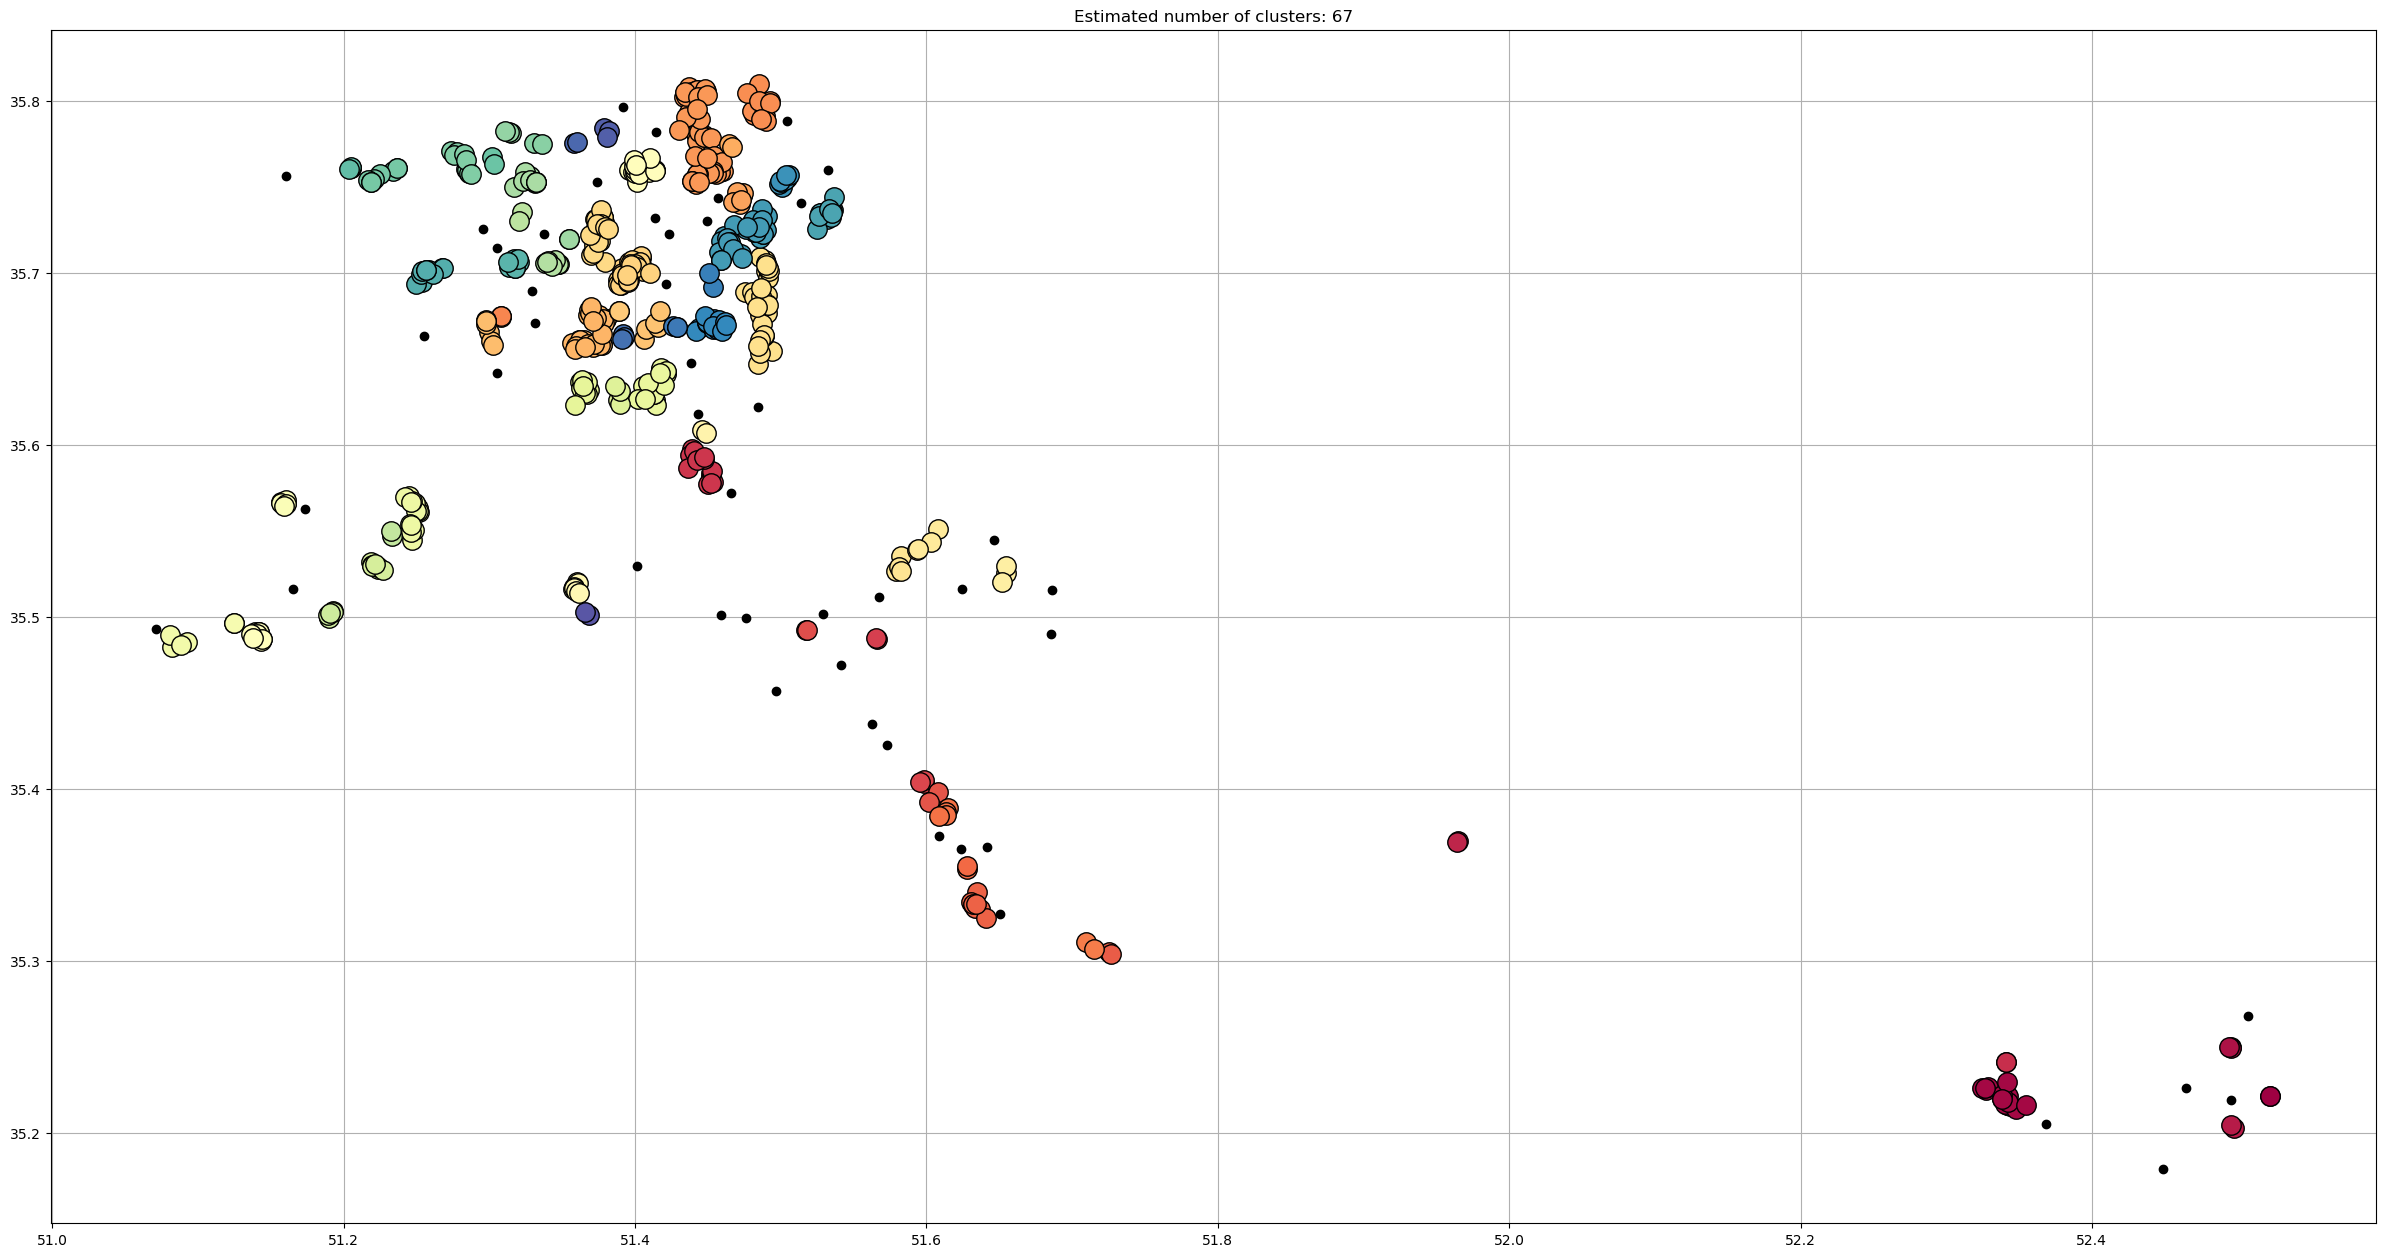

In [19]:
plt.figure(figsize=(30, 15.5))
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 1],
        xy[:, 0],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 1],
        xy[:, 0],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_cluster}")
plt.grid()
plt.show()